In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


a:   12.7109147811 +/- 2.34133542141
b:   2.45637574997 +/- 0.00224444714424


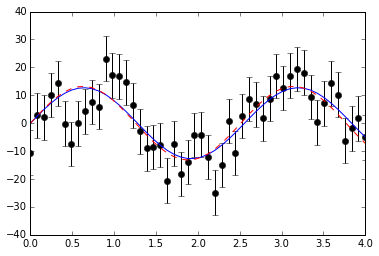

In [2]:
from scipy.optimize import curve_fit
sigma = 8
true_a = 13.2
true_b = 2.5

# this is the function we want to fit to the data:
def func(x, a, b):
    return a*np.sin(b*x)

# here we make "fake" data for fitting by calculating the function and adding some Gaussian noise
x  = np.linspace(0,4,50)    # this is the range in x, sampled by 50 data points
y  = func(x, true_a, true_b) # this is the "true" calculated value of y at each x point
yn = y + sigma*np.random.normal(size=len(x)) # this adds a noise factor (gaussian with width sigma) to simulator measurement error.
sy = zeros(50) + sigma;       # this is the uncertainty on each y measurement (sigma)
yn = y + sigma*np.random.normal(size=len(x))
errorbar(x,yn, sy, color="black", fmt="o")

# this is the curve fitting step:
approx = [10, 2]   # this is our initial guess for the parameters
# now we perform a least squared fit of the function func to the data (x,yn+/-sy)
popt, pcov = curve_fit(func, x, yn, p0=approx, sigma=sy)  

# Plot the fitted value of the function
yfit =func(x, popt[0], popt[1])
plot(x,yfit, "b")

# Compare to the "true" value:
ytrue =func(x, true_a, true_b)
plot(x,ytrue, "r", linestyle="--")

# Report fitted parameters:
print "a:  ", popt[0], "+/-", pcov[0][0]
print "b:  ", popt[1], "+/-", pcov[1][1]



a:   7694.44729008 +/- 32.6217626453
b:   49.8795270161 +/- 0.1825489112
c:   4632.54455769 +/- 245.582593464
d:   123.030348972 +/- 0.197627601576
e:   3.39607918457 +/- 0.194336147422


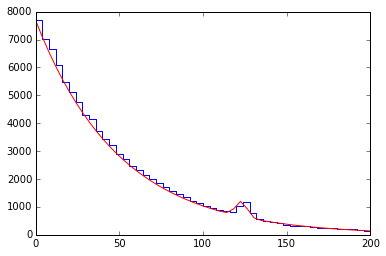

In [78]:
# Exercise:  Find the Higgs Boson!  (To be discussed in class)

from scipy.stats import norm

import itertools
true_mh    = 125
res_mh     = 3
bkg_lambda = 50

sig = random.normal(true_mh,res_mh, 1000)
bkg = random.exponential(bkg_lambda, 100000)
mgg = []
for x in itertools.chain(sig, bkg):
    mgg.append(x)
h,xe = histogram(mgg, 50, (0.0, 200.0))

plot(xe, append(h,0), drawstyle='steps-post')



def func(x, a,b,c,d,e):
    return a*exp(-x/b)+c*norm.pdf(x,d,e)

a = 7640
b = 50.0
c = 3000
d = 125
e = 3


sig = sqrt(append(h,10000000.0))
#print h
#print sig
popt, pcov = curve_fit(func, xe, append(h,0), p0=[a,b,c,d,e], sigma=sig)
                       
xfit =np.linspace(0,200) 
yfit =func(xfit, popt[0], popt[1], popt[2],popt[3], popt[4])
plot(xfit,yfit, "r")

#Report fitted parameters:
print "a:  ", popt[0], "+/-", sqrt(pcov[0][0])
print "b:  ", popt[1], "+/-", sqrt(pcov[1][1])
print "c:  ", popt[2], "+/-", sqrt(pcov[2][2])
print "d:  ", popt[3], "+/-", sqrt(pcov[3][3])
print "e:  ", popt[4], "+/-", sqrt(pcov[4][4])



